In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import os
import numpy as np
from src.data.dataset3d import PancreasDataset3D
from src.utils.config import load_config
from src.training.setup import get_transforms, get_augment
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
os.chdir('C:\\Users\\Usuario\\TFG\\digipanca\\')

In [107]:
config = load_config('configs/experiments/unet3d_5.yaml')

# __Functions__

In [15]:
cmap = mcolors.ListedColormap(['green', 'purple', 'red', 'blue'])
boundaries = [0.5, 1.5, 2.5, 3.5, 4.5]
norm = mcolors.BoundaryNorm(boundaries, cmap.N, clip=True)
def visualize_slice(image, mask):
    mask_overlay = np.where(mask > 0, mask, np.nan)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Original
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title(f'Image')
    axes[0].axis('off')

    # Original mask
    axes[1].imshow(image, cmap="gray")
    axes[1].imshow(mask_overlay, cmap=cmap, norm=norm, alpha=0.8)
    axes[1].set_title("Mask")
    axes[1].axis('off')

    # Add classes colorbar
    cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])
    colorbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
    colorbar.set_ticks([1, 2, 3, 4])
    colorbar.set_ticklabels(['Pancreas', 'Tumor', 'Arteries', 'Veins'])

    plt.show()

# Testing transforms

In [5]:
print(config['transforms'])

[{'ApplyWindow': {'window_level': 50, 'window_width': 400}}, {'Normalize': {}}, {'ToTensor': {}}]


In [10]:
transforms = get_transforms(config)
ds_t = PancreasDataset3D(
    data_dir='data/processed/3d_res/train',
    patient_ids=['rtum1'],
    transform=transforms,
    augment=None
)

📊 Loading dataset... 77 sub-volumes found.


In [28]:
images_t, masks_t, _ = ds_t[0]

GETTING ITEM
Image shape: torch.Size([16, 256, 256])
Mask shape: torch.Size([16, 256, 256])
Transformed image shape: torch.Size([1, 16, 256, 256])
Transformed mask shape: torch.Size([16, 256, 256])
Final image shape: torch.Size([1, 16, 256, 256])
Final mask shape: torch.Size([16, 256, 256])


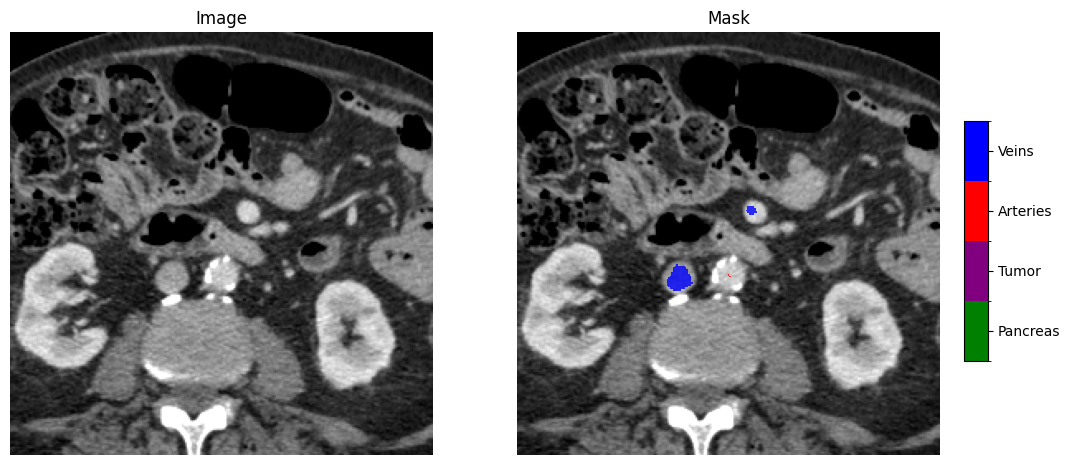

In [29]:
slice_idx = 10
visualize_slice(images_t[0, slice_idx, ...], masks_t[slice_idx, ...])

# Testing augmentations

In [89]:
print(config.get('augmentations', None))

[{'RandomAffine': {'scales': [0.95, 1.05], 'degrees': 10, 'translation': 5, 'p': 0.1}}, {'RandomFlip': {'axes': [0], 'p': 0.3}}, {'RandomNoise': {'mean': 0, 'std': [0, 0.05], 'p': 0.3}}, {'RandomBlur': {'p': 0.3}}]


In [108]:
augment = get_augment(config)
ds_a = PancreasDataset3D(
    data_dir='data/processed/3d_res/train',
    patient_ids=['rtum1'],
    transform=None,
    augment=augment
)

📊 Loading dataset... 77 sub-volumes found.


In [109]:
images_a, masks_a, _ = ds_a[0]

GETTING ITEM
Image shape: torch.Size([16, 256, 256])
Mask shape: torch.Size([16, 256, 256])
Augmented image shape: torch.Size([1, 16, 256, 256])
Augmented mask shape: torch.Size([16, 256, 256])
Final image shape: torch.Size([1, 16, 256, 256])
Final mask shape: torch.Size([16, 256, 256])


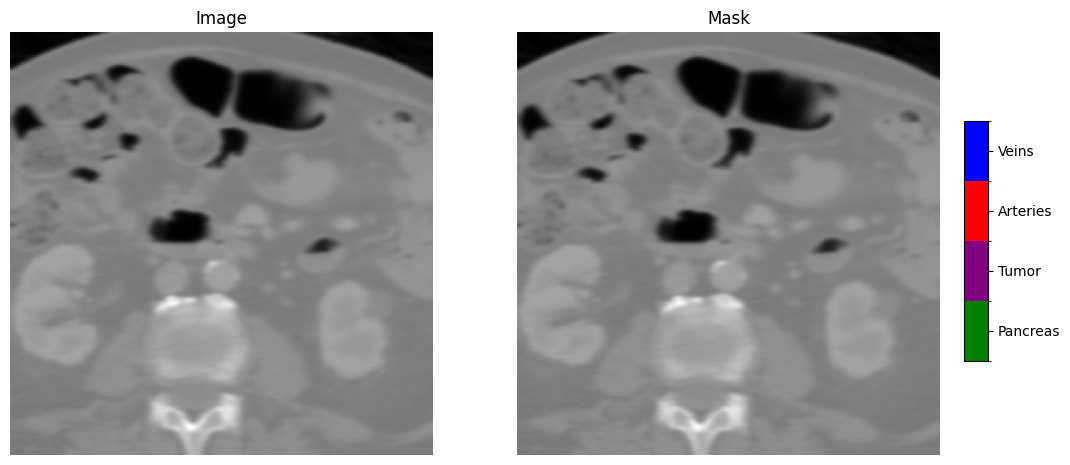

In [110]:
slice_idx = 10
visualize_slice(images_a[0, slice_idx, ...], masks_a[slice_idx, ...])

# __Testing both__

In [111]:
ds_both = PancreasDataset3D(
    data_dir='data/processed/3d_res/train',
    patient_ids=['rtum1'],
    transform=transforms,
    augment=augment
)

📊 Loading dataset... 77 sub-volumes found.


In [112]:
images_b, masks_b, _ = ds_both[0]

GETTING ITEM
Image shape: torch.Size([16, 256, 256])
Mask shape: torch.Size([16, 256, 256])
Transformed image shape: torch.Size([1, 16, 256, 256])
Transformed mask shape: torch.Size([16, 256, 256])
Augmented image shape: torch.Size([1, 16, 256, 256])
Augmented mask shape: torch.Size([16, 256, 256])
Final image shape: torch.Size([1, 16, 256, 256])
Final mask shape: torch.Size([16, 256, 256])


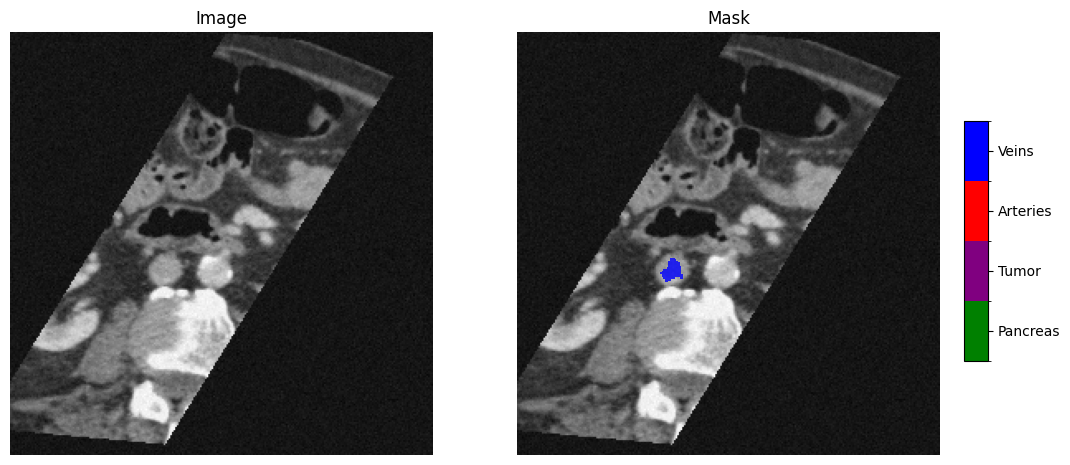

In [114]:
slice_idx = 10
visualize_slice(images_b[0, slice_idx, ...], masks_b[slice_idx, ...])